Loading the required libraries and components

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Loading the dataset

In [5]:
data=pd.read_excel("covid_impact_on_airport_traffic.xlsx")

Checking the dimension of dataset

In [6]:
data.shape

(7247, 11)

Check for null value

In [7]:
data.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

Summary of the dataset

In [8]:
data.describe(include="all")

AggregationMethod                 Date  Version       AirportName  \
count               7247                 7247   7247.0              7247   
unique                 1                  262      NaN                28   
top                Daily  2020-03-27 00:00:00      NaN  Montreal Trudeau   
freq                7247                   28      NaN               262   
first                NaN  2020-03-16 00:00:00      NaN               NaN   
last                 NaN  2020-12-02 00:00:00      NaN               NaN   
mean                 NaN                  NaN      1.0               NaN   
std                  NaN                  NaN      0.0               NaN   
min                  NaN                  NaN      1.0               NaN   
25%                  NaN                  NaN      1.0               NaN   
50%                  NaN                  NaN      1.0               NaN   
75%                  NaN                  NaN      1.0               NaN   
max                  NaN                  NaN      1.0               NaN   

        PercentOfBaseline                                   Centroid  \
count         7247.000000                                       7247   
unique                NaN                                         28   
top                   NaN  POINT(-84.4279188822754 33.6410758198944)   
freq                  NaN                                        262   
first                 NaN                                        NaN   
last                  NaN                                        NaN   
mean            66.651442                                        NaN   
std             22.134433                                        NaN   
min              0.000000                                        NaN   
25%             53.000000                                        NaN   
50%             67.000000                                        NaN   
75%             84.000000                                        NaN   
max            100.000000                                        NaN   

            City     State ISO_3166_2                         Country  \
count       7247      7247       7247                            7247   
unique        27        23         23                               4   
top     New York  New York      US-CA  United States of America (the)   
freq         523       523        523                            4441   
first        NaN       NaN        NaN                             NaN   
last         NaN       NaN        NaN                             NaN   
mean         NaN       NaN        NaN                             NaN   
std          NaN       NaN        NaN                             NaN   
min          NaN       NaN        NaN                             NaN   
25%          NaN       NaN        NaN                             NaN   
50%          NaN       NaN        NaN                             NaN   
75%          NaN       NaN        NaN                             NaN   
max          NaN       NaN        NaN                             NaN   

                                                Geography  
count                                                7247  
unique                                                 28  
top     POLYGON((-84.4299745559692 33.657852680999, -8...  
freq                                                  262  
first                                                 NaN  
last                                                  NaN  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AggregationMethod  7247 non-null   object        
 1   Date               7247 non-null   datetime64[ns]
 2   Version            7247 non-null   int64         
 3   AirportName        7247 non-null   object        
 4   PercentOfBaseline  7247 non-null   int64         
 5   Centroid           7247 non-null   object        
 6   City               7247 non-null   object        
 7   State              7247 non-null   object        
 8   ISO_3166_2         7247 non-null   object        
 9   Country            7247 non-null   object        
 10  Geography          7247 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 622.9+ KB


Changing factor into numerical

In [10]:
data["AirportName"]=data["AirportName"].astype('category')
data["Airport_Cat"]=data["AirportName"].cat.codes
data["Airport_Cat"].head()

0    13
1    13
2    13
3    13
4    13
Name: Airport_Cat, dtype: int8

The important categorical variables are 

AirportName 

Centroid  
City 

State 

1. Pie Chart
2. Bar Plot
3. Frequency Table

In [11]:
data["AirportName"].value_counts()

Los Angeles International                    262
Dallas/Fort Worth International              262
Montreal Trudeau                             262
Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Boston Logan International                   261
Washington Dulles International              261
Vancouver International                      261
Toronto Pearson                              261
Seattle-Tacoma International                 261
San Francisco International                  261
Newark Liberty International                 261
Miami International                          261
McCarran International                       261
LaGuardia                                    261
Calgary International                        261
Detroit Metropolitan Wayne County            261
Denver International                         261
Daniel K. Inouye International               261
Chicago OHare International                  261
Charlotte Douglas In

In [12]:
imp_feat=['AirportName','Centroid', 'City', 'State','Country']

In [13]:
list(enumerate(imp_feat))

[(0, 'AirportName'),
 (1, 'Centroid'),
 (2, 'City'),
 (3, 'State'),
 (4, 'Country')]

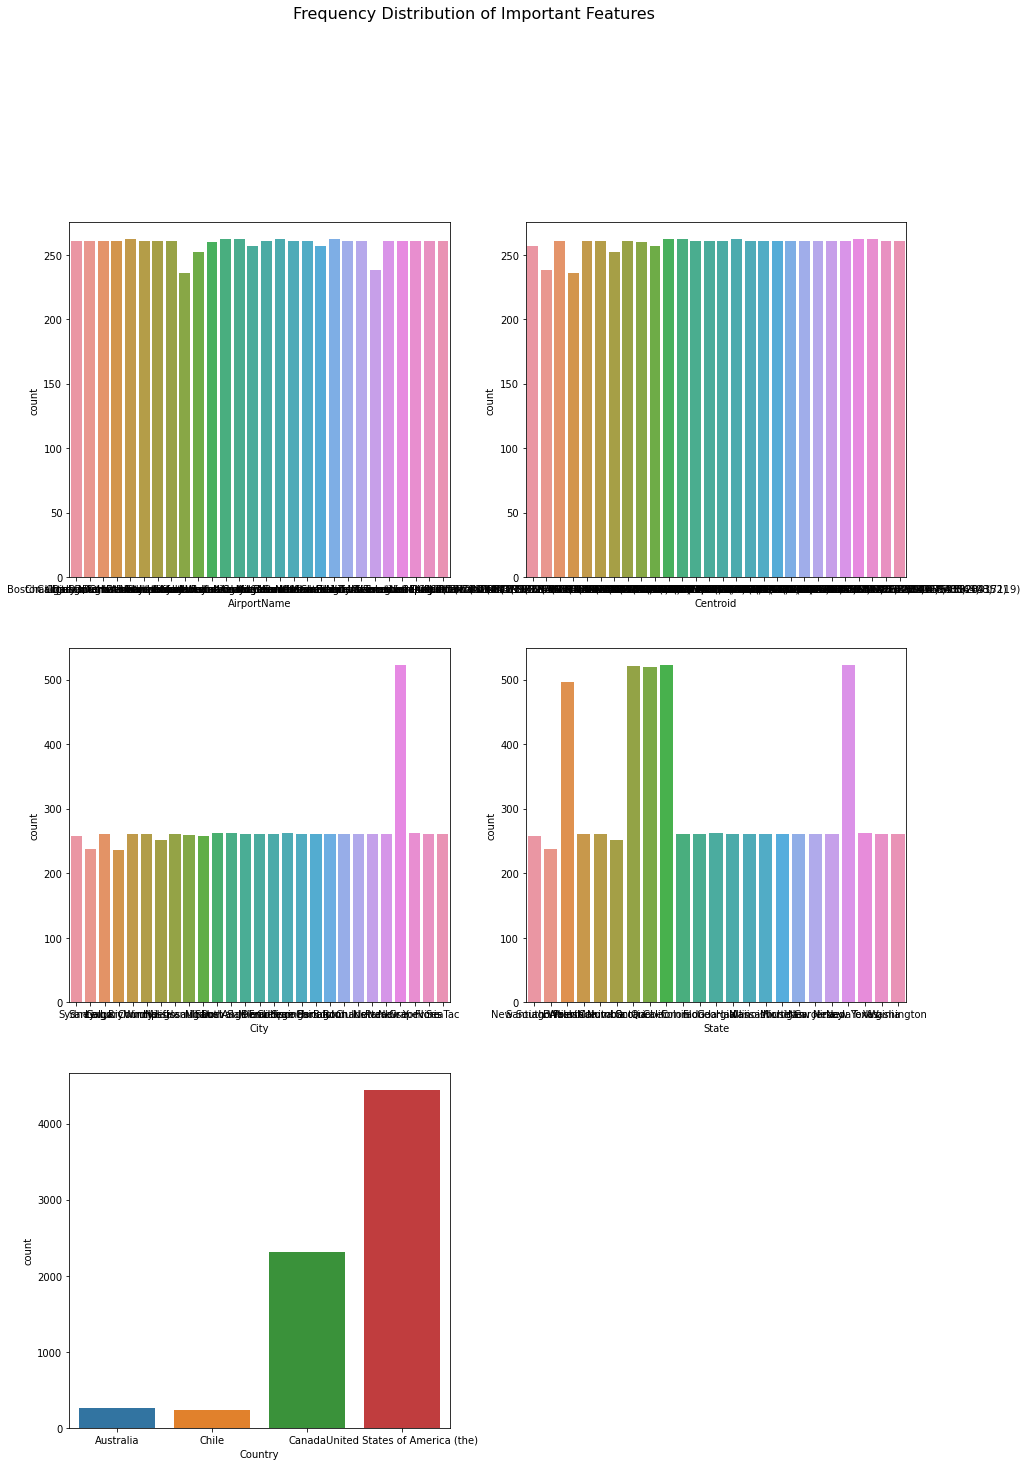

In [14]:
plt.figure(figsize=(15,30))
plt.suptitle("Frequency Distribution of Important Features",fontsize=16)
for i in enumerate(imp_feat):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(i[1],data=data)
    plt.xticks(ticks=None)
plt.show()

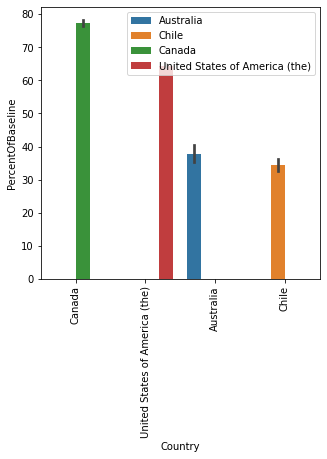

In [15]:
plt.figure(figsize=(5,5))
sns.barplot('Country', 'PercentOfBaseline', hue='Country', data=data,order=["Canada", "United States of America (the)","Australia","Chile"])
plt.xticks(rotation=90)
plt.legend(loc='upper right')

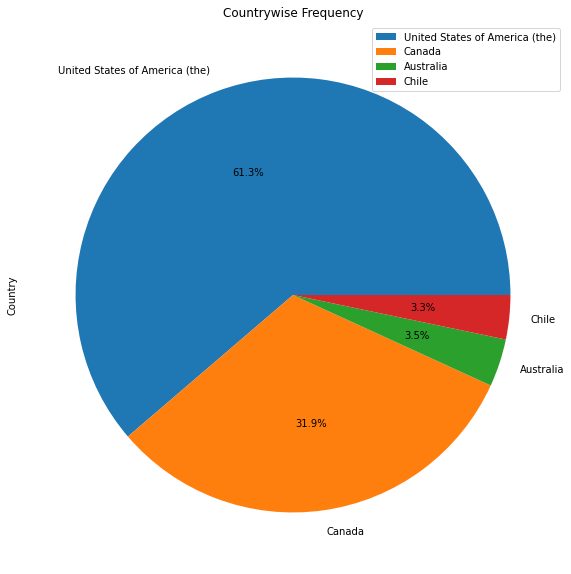

In [16]:
country_pie=pd.DataFrame(data["Country"].value_counts())
country_pie_plot=country_pie.plot.pie(y='Country',figsize=(10,10),autopct='%1.1f%%')
country_pie_plot.set_title("Countrywise Frequency")
plt.show()

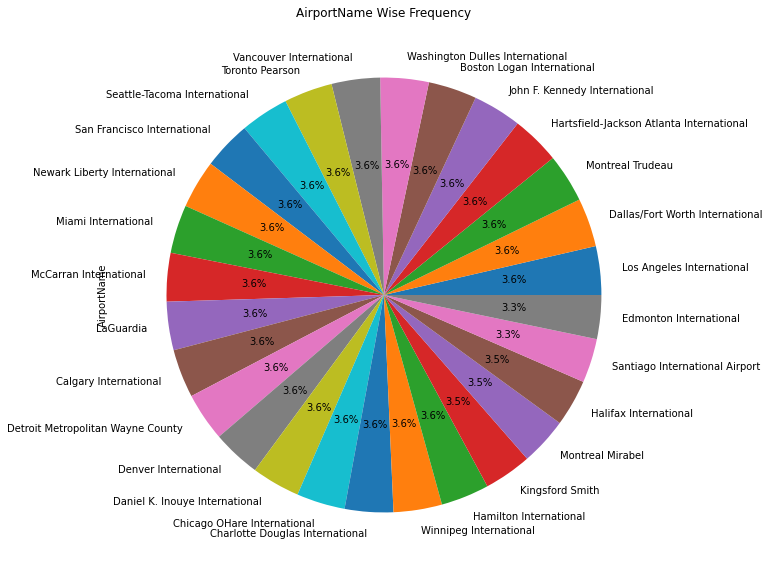

In [17]:
country_pie=pd.DataFrame(data["AirportName"].value_counts())
country_pie_plot=country_pie.plot.pie(y='AirportName',figsize=(10,10),autopct='%1.1f%%',legend=False)
country_pie_plot.set_title("AirportName Wise Frequency")
plt.show()

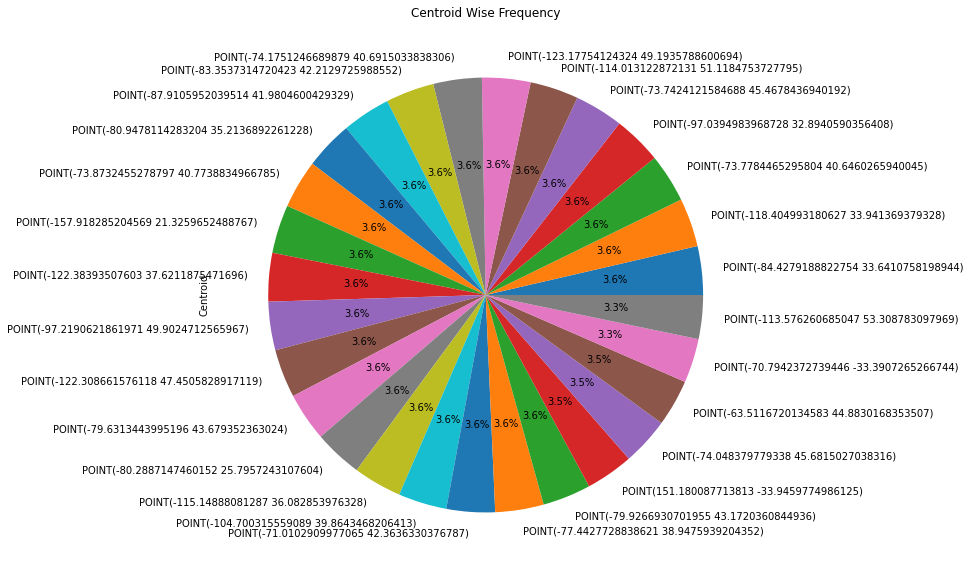

In [18]:
country_pie=pd.DataFrame(data["Centroid"].value_counts())
country_pie_plot=country_pie.plot.pie(y='Centroid',figsize=(10,10),autopct='%1.1f%%',legend=False)
country_pie_plot.set_title("Centroid Wise Frequency")
plt.show()

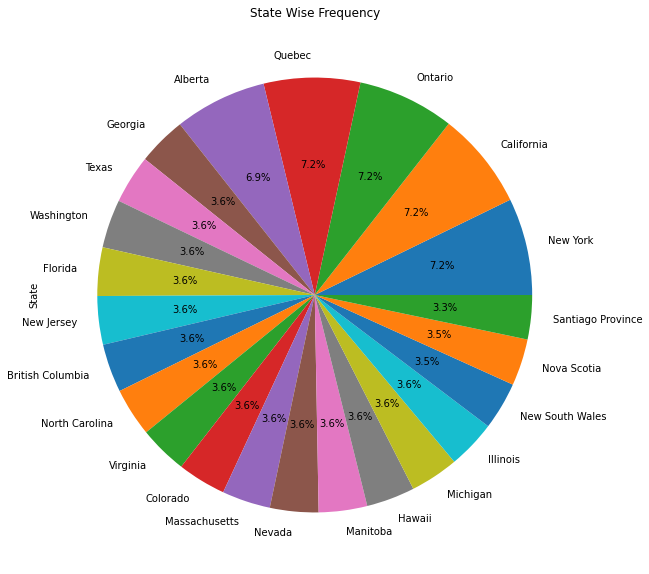

In [19]:
country_pie=pd.DataFrame(data["State"].value_counts())
country_pie_plot=country_pie.plot.pie(y='State',figsize=(10,10),autopct='%1.1f%%',legend=False)
country_pie_plot.set_title("State Wise Frequency")
plt.show()

Percent OF Baseline vs Country

<Figure size 720x720 with 0 Axes>

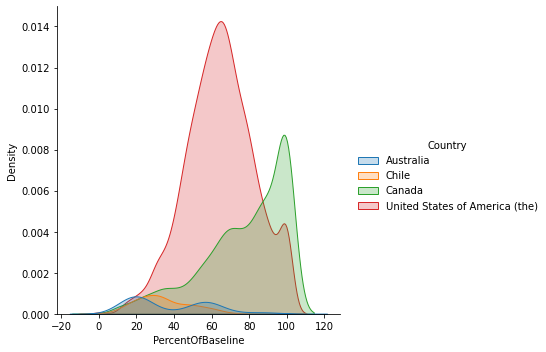

In [20]:
plt.figure(figsize=(10,10))
sns.displot(data, x="PercentOfBaseline", hue="Country", kind="kde", fill=True)

In [21]:
data["Month"]=pd.to_datetime(data['Date'], format='%m').dt.month_name().str.slice(stop=3)
data.head()

AggregationMethod       Date  Version      AirportName  PercentOfBaseline  \
0             Daily 2020-04-03        1  Kingsford Smith                 64   
1             Daily 2020-04-13        1  Kingsford Smith                 29   
2             Daily 2020-07-10        1  Kingsford Smith                 54   
3             Daily 2020-09-02        1  Kingsford Smith                 18   
4             Daily 2020-10-31        1  Kingsford Smith                 22   

                                    Centroid    City            State  \
0  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
1  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
2  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
3  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   
4  POINT(151.180087713813 -33.9459774986125)  Sydney  New South Wales   

  ISO_3166_2    Country                                          Geography  \
0         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
1         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
2         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
3         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   
4         AU  Australia  POLYGON((151.164354085922 -33.9301772341877, 1...   

   Airport_Cat Month  
0           13   Apr  
1           13   Apr  
2           13   Jul  
3           13   Sep  
4           13   Oct

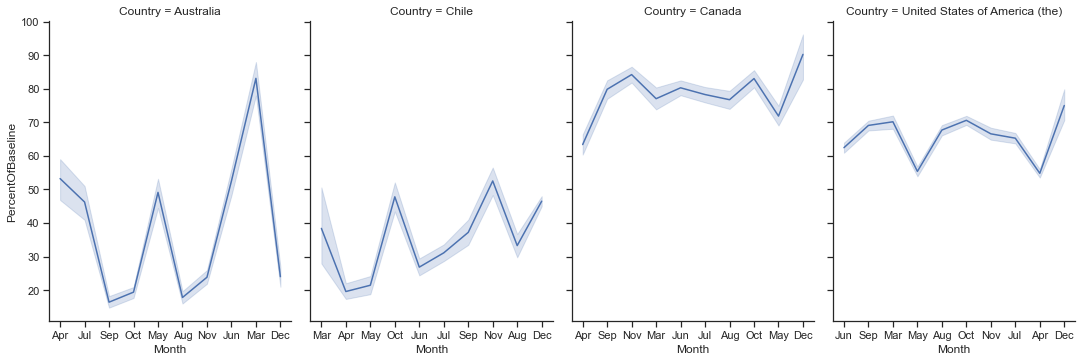

In [22]:
sns.set_theme(style="ticks")
dots = sns.load_dataset("dots")
palette = sns.color_palette("rocket_r")
sns.relplot(
    data=data,
    x="Month", y="PercentOfBaseline",
    col="Country",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

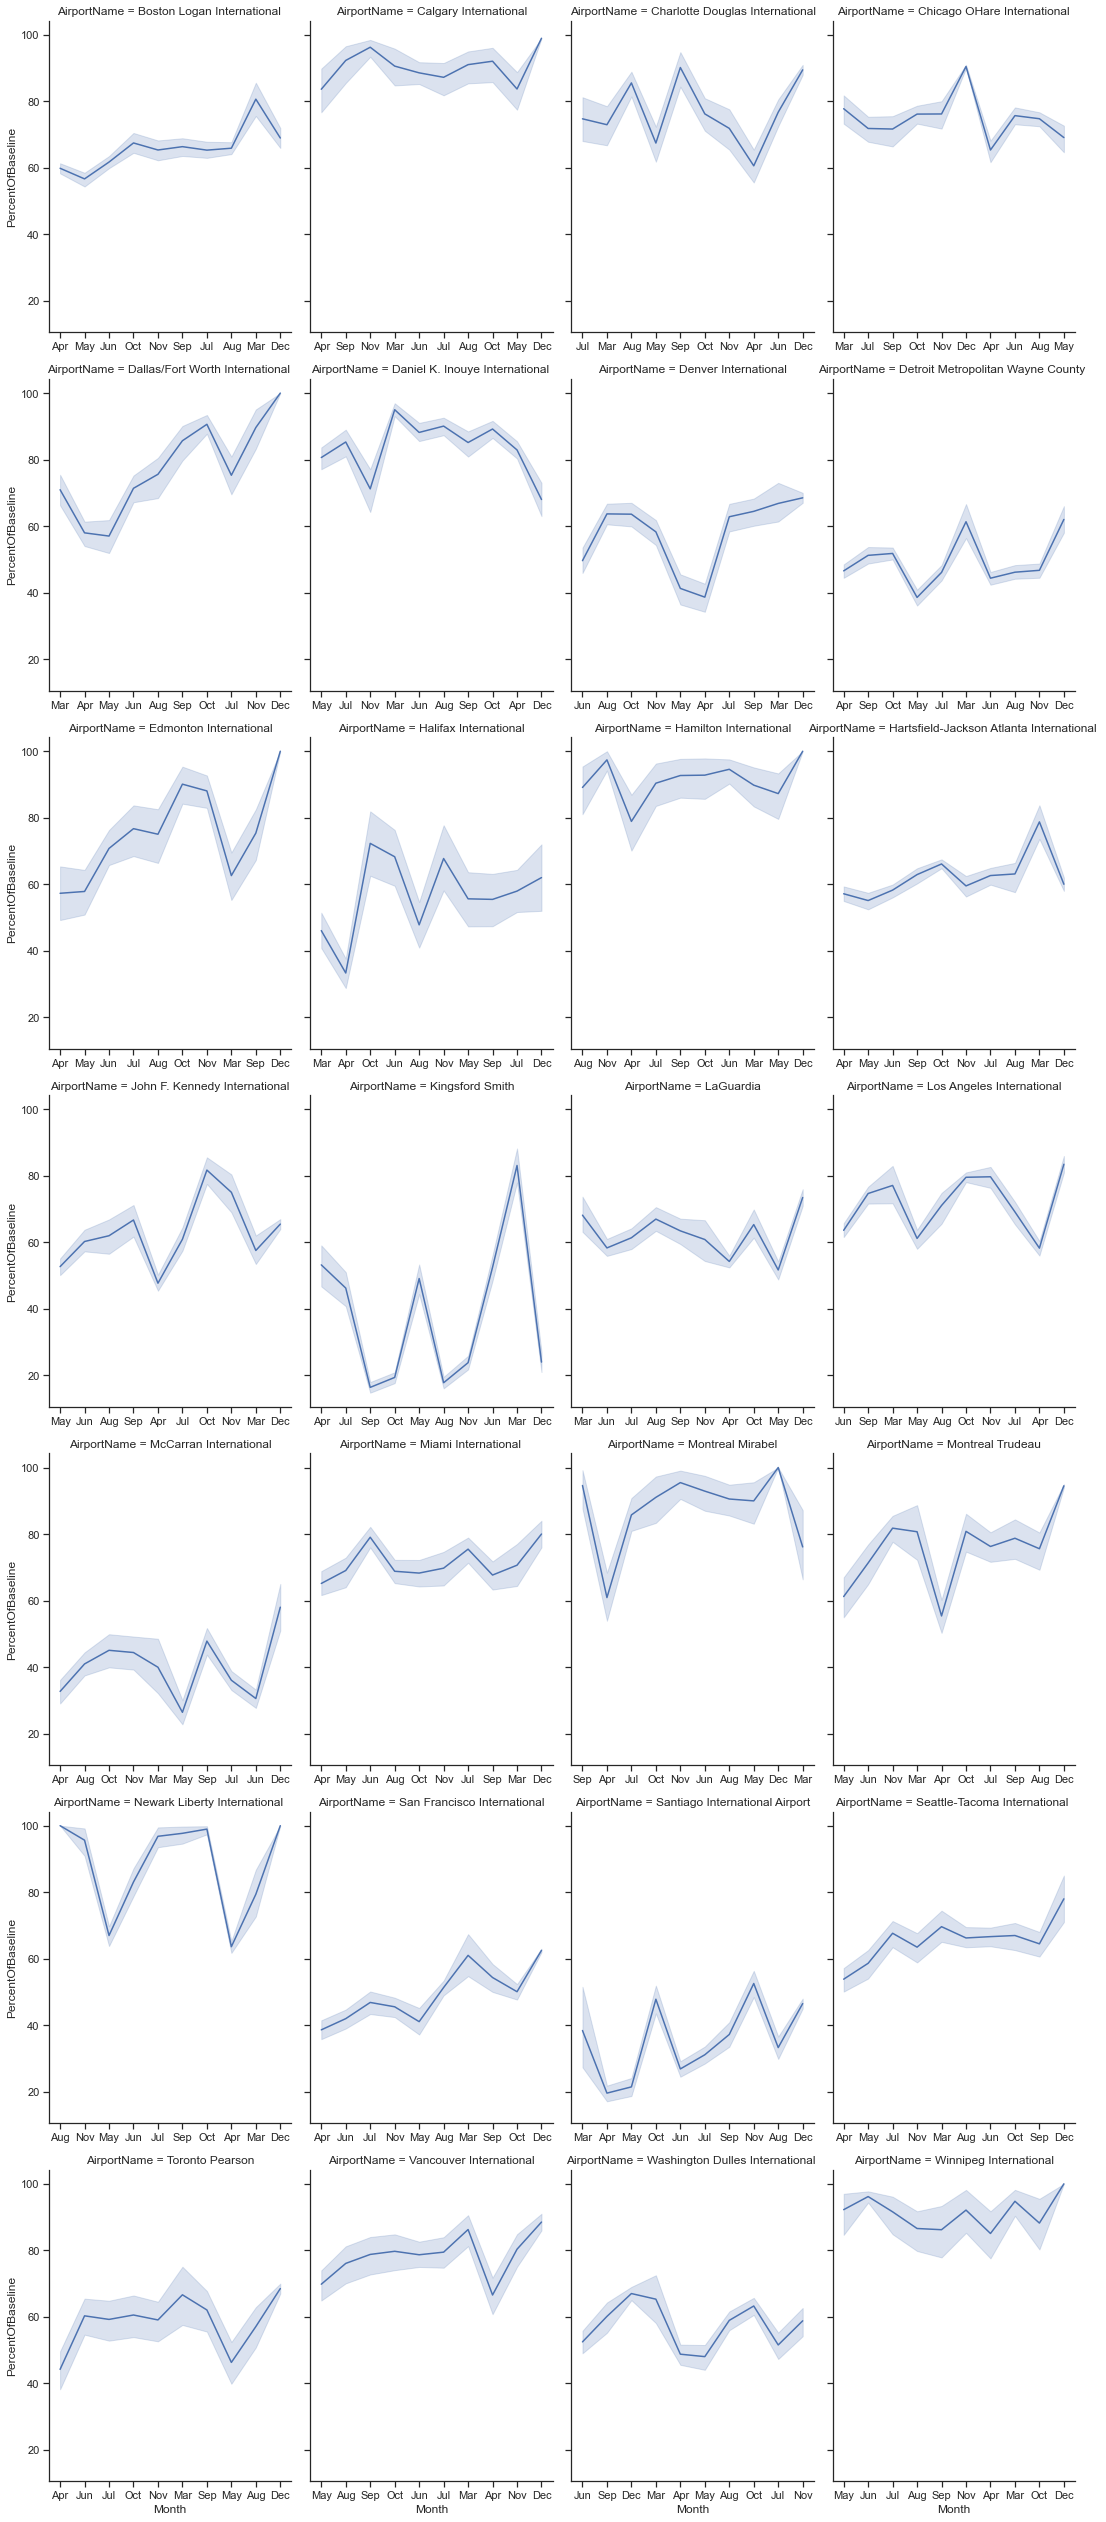

In [23]:
sns.set_theme(style="ticks")
dots = sns.load_dataset("dots")
palette = sns.color_palette("rocket_r")
sns.relplot(
    data=data,
    x="Month", y="PercentOfBaseline",
    col="AirportName",col_wrap=4,
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

Time Series Forecasting Model of the data - Chile

In [24]:
data_group=data.groupby(data.Country)
data_group.head(5)

AggregationMethod       Date  Version                     AirportName  \
0                Daily 2020-04-03        1                 Kingsford Smith   
1                Daily 2020-04-13        1                 Kingsford Smith   
2                Daily 2020-07-10        1                 Kingsford Smith   
3                Daily 2020-09-02        1                 Kingsford Smith   
4                Daily 2020-10-31        1                 Kingsford Smith   
257              Daily 2020-03-17        1  Santiago International Airport   
258              Daily 2020-04-28        1  Santiago International Airport   
259              Daily 2020-05-12        1  Santiago International Airport   
260              Daily 2020-05-21        1  Santiago International Airport   
261              Daily 2020-10-19        1  Santiago International Airport   
495              Daily 2020-04-05        1           Calgary International   
496              Daily 2020-09-01        1           Calgary International   
497              Daily 2020-11-15        1           Calgary International   
498              Daily 2020-03-26        1           Calgary International   
499              Daily 2020-04-25        1           Calgary International   
2806             Daily 2020-06-22        1       Los Angeles International   
2807             Daily 2020-09-27        1       Los Angeles International   
2808             Daily 2020-03-22        1       Los Angeles International   
2809             Daily 2020-03-23        1       Los Angeles International   
2810             Daily 2020-05-19        1       Los Angeles International   

      PercentOfBaseline                                    Centroid  \
0                    64   POINT(151.180087713813 -33.9459774986125)   
1                    29   POINT(151.180087713813 -33.9459774986125)   
2                    54   POINT(151.180087713813 -33.9459774986125)   
3                    18   POINT(151.180087713813 -33.9459774986125)   
4                    22   POINT(151.180087713813 -33.9459774986125)   
257                  72  POINT(-70.7942372739446 -33.3907265266744)   
258                  21  POINT(-70.7942372739446 -33.3907265266744)   
259                  35  POINT(-70.7942372739446 -33.3907265266744)   
260                  13  POINT(-70.7942372739446 -33.3907265266744)   
261                  55  POINT(-70.7942372739446 -33.3907265266744)   
495                  65   POINT(-114.013122872131 51.1184753727795)   
496                  97   POINT(-114.013122872131 51.1184753727795)   
497                 100   POINT(-114.013122872131 51.1184753727795)   
498                  91   POINT(-114.013122872131 51.1184753727795)   
499                  80   POINT(-114.013122872131 51.1184753727795)   
2806                 63    POINT(-118.404993180627 33.941369379328)   
2807                 68    POINT(-118.404993180627 33.941369379328)   
2808                 76    POINT(-118.404993180627 33.941369379328)   
2809                 73    POINT(-118.404993180627 33.941369379328)   
2810                 67    POINT(-118.404993180627 33.941369379328)   

             City              State ISO_3166_2  \
0          Sydney    New South Wales         AU   
1          Sydney    New South Wales         AU   
2          Sydney    New South Wales         AU   
3          Sydney    New South Wales         AU   
4          Sydney    New South Wales         AU   
257      Santiago  Santiago Province         CL   
258      Santiago  Santiago Province         CL   
259      Santiago  Santiago Province         CL   
260      Santiago  Santiago Province         CL   
261      Santiago  Santiago Province         CL   
495       Calgary            Alberta      CA-AB   
496       Calgary            Alberta      CA-AB   
497       Calgary            Alberta      CA-AB   
498       Calgary            Alberta      CA-AB   
499       Calgary            Alberta      CA-AB   
2806  Los Angeles         California      US-CA   
2807  L

In [25]:
ch=pd.DataFrame(data_group.get_group("Chile"))[["Date","PercentOfBaseline"]]
ch=ch.sort_values(by='Date')
#ch['Date']=pd.to_datetime(ch['Date'],infer_datetime_format=True)
#ch=ch.set_index(['Date'])
ch=ch.set_index([pd.Index(list(range(0,238)))])
ch.head()

Date  PercentOfBaseline
0 2020-03-16                 96
1 2020-03-17                 72
2 2020-03-18                 56
3 2020-03-19                 52
4 2020-03-20                 53

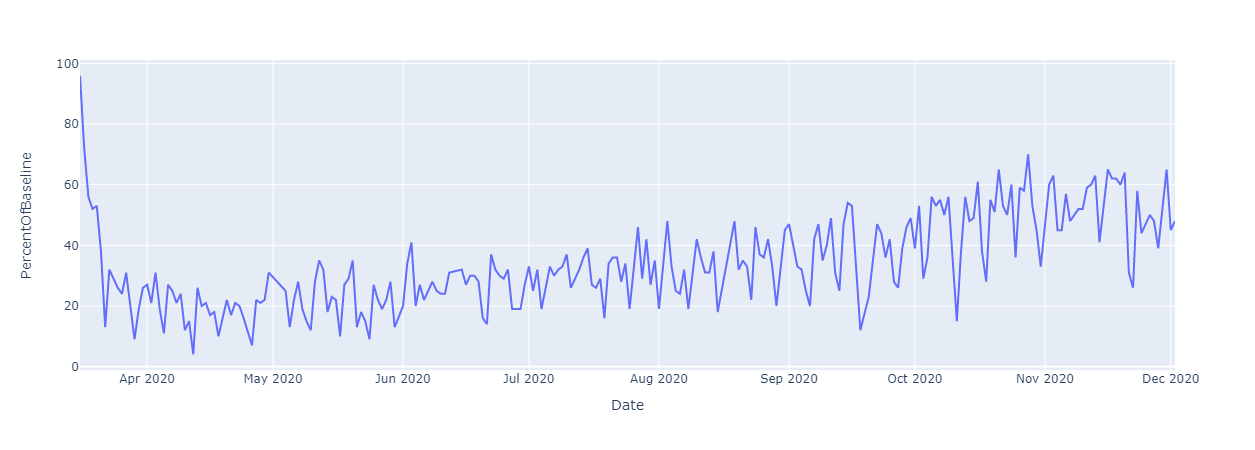

In [26]:
fig = px.line(ch, x="Date", y="PercentOfBaseline")
fig.show()

In [27]:
print('Result of ADF Test:')
dftest=adfuller(ch['PercentOfBaseline'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','no. of lags used','no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
print(dfoutput)

Result of ADF Test:
Test Statistics              -0.831164
p-value                       0.809796
no. of lags used             11.000000
no. of observations used    226.000000
Critical Value(1%)           -3.459620
Critical Value(5%)           -2.874415
Critical Value(10%)          -2.573632
dtype: float64


As we are unable to reject the null hypothesis we can conclude from the ADF test that the time series is non stationary and have unit root.

Implementing Seasonal Decompose Model

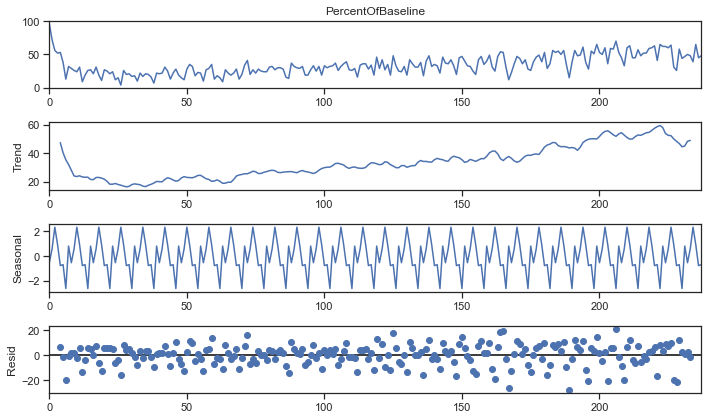

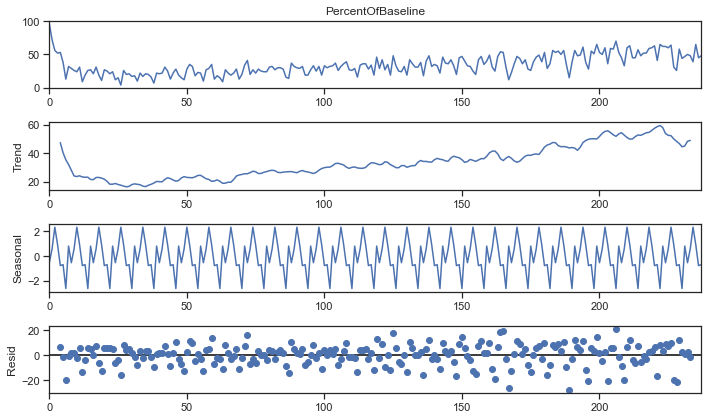

In [28]:
decomposition=seasonal_decompose(ch['PercentOfBaseline'],model='Additive',period=8)
decomposition.plot()

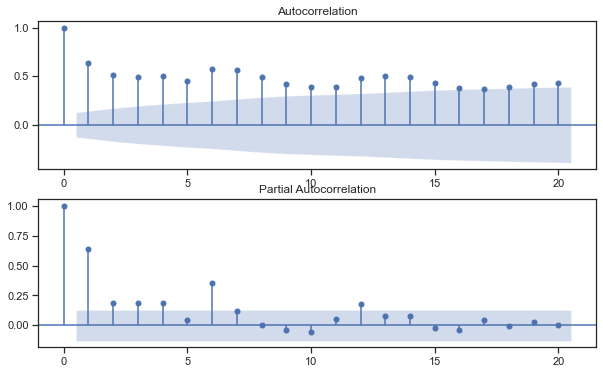

In [29]:
plt.subplot(211)
plot_acf(ch.PercentOfBaseline,lags=20,ax=plt.gca())
plt.subplot(212)
plot_pacf(ch.PercentOfBaseline,lags=20,ax=plt.gca())
plt.show()

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  238
Model:                     ARMA(3, 4)   Log Likelihood                -885.947
Method:                       css-mle   S.D. of innovations              9.926
Date:                Sat, 05 Jun 2021   AIC                           1789.894
Time:                        19:56:37   BIC                           1821.145
Sample:                             0   HQIC                          1802.489
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      39.2404      7.103      5.524      0.000      25.319      53.162
ar.L1.PercentOfBaseline     1.0727      0.091     11.813      0.000       0.895       1.251


Text(0.5, 1.0, 'RMSE: 10.5446')

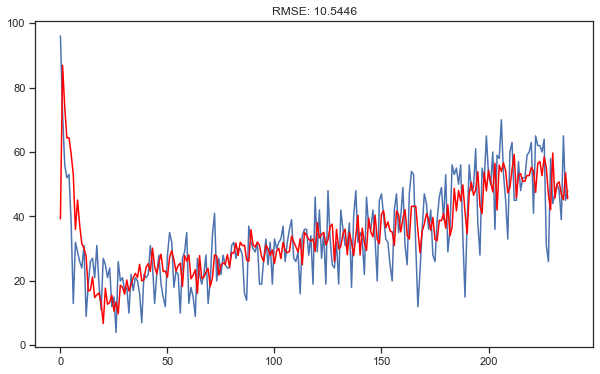

In [32]:
model=ARIMA(ch.PercentOfBaseline,order=(3,0,4))
ar_fit=model.fit(disp=1)
print(ar_fit.summary())
plt.plot(ch.PercentOfBaseline)
plt.plot(ar_fit.fittedvalues,color='red')
plt.title('RMSE: %.4f'% np.sqrt(mean_squared_error(ch['PercentOfBaseline'], ar_fit.fittedvalues)))

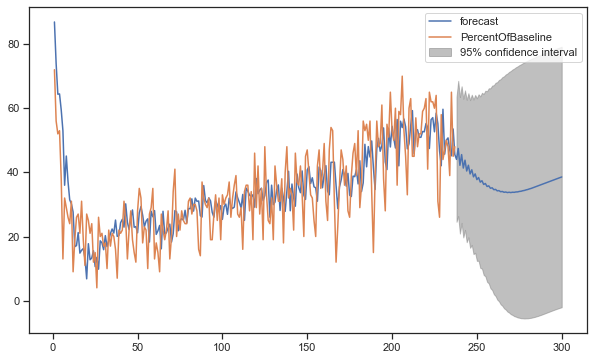

In [33]:
ar_fit.plot_predict(1,300)
plt.show()

In [34]:
ar_fit.forecast(steps=30)

(array([44.04921844, 47.45648761, 42.19760153, 45.53832784, 41.33350531,
        43.79803675, 40.42280752, 42.22167062, 39.50266223, 40.79940097,
        38.60259654, 39.52412539, 37.74578135, 38.39042321, 36.95004974,
        37.39378195, 36.22872286, 36.53003576, 35.59128873, 35.79497015,
        35.0439685 , 35.18405649, 34.59019634, 34.69228753, 34.23103234,
        34.3140909 , 33.96552316, 34.04330242, 33.79102114, 33.87318427]),
 array([ 9.92644615, 10.7551124 , 10.85886845, 10.87131474, 11.03560216,
        11.09753126, 11.32623549, 11.4567974 , 11.74616194, 11.94820373,
        12.28823343, 12.55332449, 12.93031885, 13.24383608, 13.64293215,
        13.9881584 , 14.39519438, 14.75599716, 15.15857015, 15.52082079,
        15.90872367, 16.26085284, 16.62613324, 16.9591913 , 17.29601821,
        17.60349323, 17.90794295, 18.18548208, 18.45530101, 18.70040895]),
 array([[24.59374149, 63.50469538],
        [26.37685466, 68.53612056],
        [20.91461045, 63.4805926 ],
        [24.